1 - IMPORTS / FUNCTIONS

In [188]:

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
%run dataManagementPart2.ipynb

import seaborn as sb
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import sklearn as sklearn
from sklearn.neural_network import MLPClassifier

def labels01(labels):
    newLabels = []
    for label in labels:
        if label == 1:
            newLabels.append(0)
        else:
            newLabels.append(1)
    return newLabels


2 - Data Preprocessing

In [189]:
# Data files
relativePath1 = '../Data/radiomics_features_set1.csv'
relativePath2 = '../Data/radiomics_features_set2.csv'

# Prepare data
data = readCSV(relativePath1, relativePath2)
labelsB, labelsF = getLabels(data)
dataB, dataF = getData(data)
labelsF = labels01(labelsF)

# Normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataF = scaler.fit_transform(dataF)

# Random undersampling to balance the classes
sampledDataF, sampledLabelsF = resample(dataF, labelsF, n_samples=dataF.shape[0], random_state=0, replace=False)

# Split data and labels into training and testing
trainingDataF, testingDataF, trainingLabelsF, testingLabelsF = train_test_split(dataF, labelsF)
sampledTrainingDataF, sampledTestingDataF, sampledTrainingLabelsF, sampledTestingLabelsF = train_test_split(sampledDataF, sampledLabelsF)

# Transforming to numpy array
trainingDataF = np.array(trainingDataF)
testingDataF = np.array(testingDataF)
trainingLabelsF = np.array(trainingLabelsF)
testingLabelsF = np.array(testingLabelsF)
sampledTrainingDataF = np.array(sampledTrainingDataF)
sampledTestingDataF = np.array(sampledTestingDataF)
sampledTrainingLabelsF = np.array(sampledTrainingLabelsF)
sampledTestingLabelsF = np.array(sampledTestingLabelsF)


(206, 102) (37, 102) (16, 102)


3 - Create Neural Network

In [190]:
# Initializing the Neural Network
model = tf.keras.models.Sequential()

# Layers
model.add(tf.keras.layers.Dense(52, input_dim=102, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

# Compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Initializing the Neural Network
model2 = tf.keras.models.Sequential()

# Layers
model2.add(tf.keras.layers.Dense(52, input_dim=102, activation='relu'))
model2.add(tf.keras.layers.Dense(26, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

# Compile
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 52)                5356      
                                                                 
 dense_67 (Dense)            (None, 26)                1378      
                                                                 
 dense_68 (Dense)            (None, 1)                 27        
                                                                 
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 52)                5356      
                                                                 
 dense_70 (Dense)           

4 - MLP Classifier

In [191]:
# Creating MLP Neural Network
MLPmodel = MLPClassifier(solver='lbfgs',
                         alpha=1e-5,
                         hidden_layer_sizes=(51,),
                         random_state=1)

# Creating MLP Neural Network
MLPmodel2 = MLPClassifier(solver='lbfgs',
                          alpha=1e-5,
                          hidden_layer_sizes=(51,),
                          random_state=1)

5 - Fit Neural Network

In [192]:
# Fit
hist = model.fit(trainingDataF, trainingLabelsF,
                 validation_split=0.2, epochs=350)

# Fit
hist2 = model2.fit(sampledTrainingDataF, sampledTrainingLabelsF,
                 validation_split=0.2, epochs=350)

Epoch 1/350
6/6 [==============================] - 1s 37ms/step - loss: 0.6936 - accuracy: 0.5879 - val_loss: 0.6887 - val_accuracy: 0.5714
Epoch 2/350
6/6 [==============================] - 0s 8ms/step - loss: 0.6772 - accuracy: 0.5939 - val_loss: 0.6851 - val_accuracy: 0.5714
Epoch 3/350
6/6 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.5939 - val_loss: 0.6844 - val_accuracy: 0.5714
Epoch 4/350
6/6 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.5939 - val_loss: 0.6831 - val_accuracy: 0.5714
Epoch 5/350
6/6 [==============================] - 0s 20ms/step - loss: 0.6701 - accuracy: 0.5939 - val_loss: 0.6815 - val_accuracy: 0.5714
Epoch 6/350
6/6 [==============================] - 0s 10ms/step - loss: 0.6678 - accuracy: 0.5939 - val_loss: 0.6821 - val_accuracy: 0.5714
Epoch 7/350
6/6 [==============================] - 0s 12ms/step - loss: 0.6658 - accuracy: 0.5939 - val_loss: 0.6829 - val_accuracy: 0.5714
Epoch 8/350
6/6 [======

6 - Fit MLP Classifier

In [193]:
# Fit
MLPmodel.fit(trainingDataF, trainingLabelsF)

# Fit
MLPmodel2.fit(sampledTrainingDataF, sampledTrainingLabelsF)

c:\Users\ricka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\ricka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(51,), random_state=1,
              solver='lbfgs')

6 - Predict

In [194]:
# Predict
predict = model.predict(testingDataF)

# Predict
predict2 = model2.predict(sampledTestingDataF)

3/3 [==============================] - 0s 3ms/step


In [195]:
# Predict
MLPpredict = MLPmodel.predict(testingDataF)

# Predict
MLPpredict2 = MLPmodel2.predict(sampledTestingDataF)

7 - Accuracy during training

[]

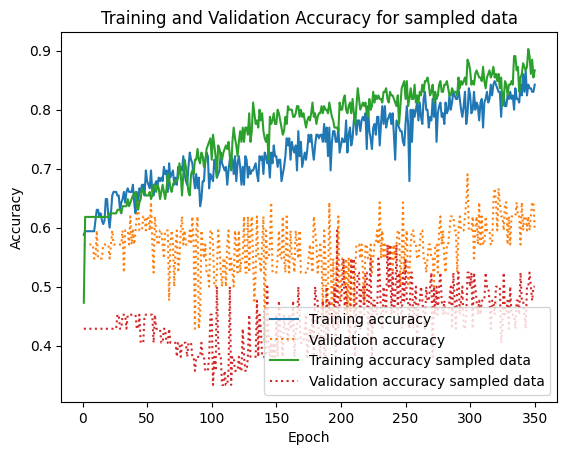

In [196]:
# Plot accuracy evolution during training normal data
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Plot accuracy evolution during training sampled data
acc = hist2.history['accuracy']
val = hist2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy sampled data')
plt.plot(epochs, val, ':', label='Validation accuracy sampled data')
plt.title('Training and Validation Accuracy for sampled data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


8 - Accuracy

In [197]:
roundedPredict = predict.round()
roundedPredict2 = predict2.round()

score = accuracy_score(testingLabelsF, roundedPredict)
print("F-score = ", score)

score2 = accuracy_score(sampledTestingLabelsF, roundedPredict2)
print("F-score sampled data = ", score2)


F-score =  0.5
F-score sampled data =  0.6428571428571429


In [198]:
MLProundedPredict = MLPpredict.round()
MLProundedPredict2 = MLPpredict2.round()

MLPscore = accuracy_score(testingLabelsF, MLProundedPredict)
print("MLP F-score = ", MLPscore)

MLPscore2 = accuracy_score(sampledTestingLabelsF, MLProundedPredict2)
print("MLP F-score sampled data = ", MLPscore2)

MLP F-score =  0.5285714285714286
MLP F-score sampled data =  0.6428571428571429


Text(77.92222222222227, 0.5, 'Actual label')

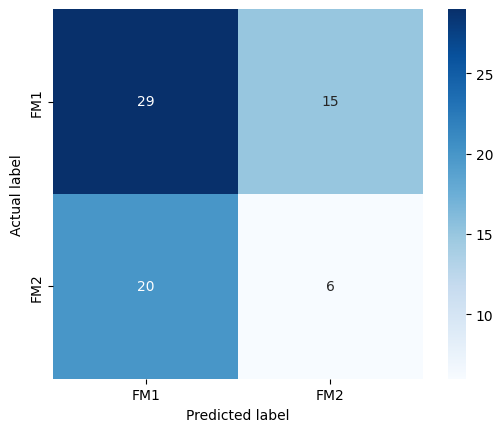

In [199]:
# Confusion Matrix
roundedPredict = predict.round()
confusionMatrix = confusion_matrix(testingLabelsF, roundedPredict)
labels = ['FM1', 'FM2']

sb.heatmap(confusionMatrix, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(77.92222222222227, 0.5, 'Actual label')

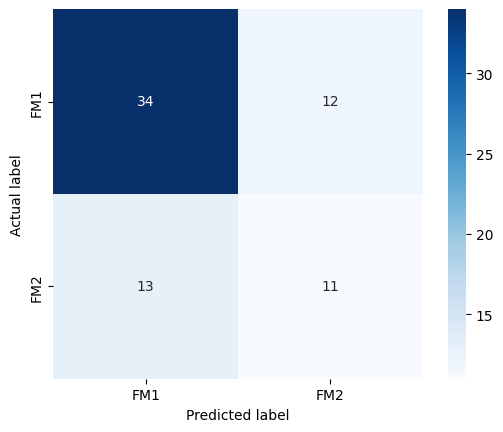

In [200]:
# Confusion Matrix
roundedPredict2 = predict2.round()
confusionMatrix2 = confusion_matrix(sampledTestingLabelsF, roundedPredict2)
labels = ['FM1', 'FM2']

sb.heatmap(confusionMatrix2, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(77.92222222222227, 0.5, 'Actual label')

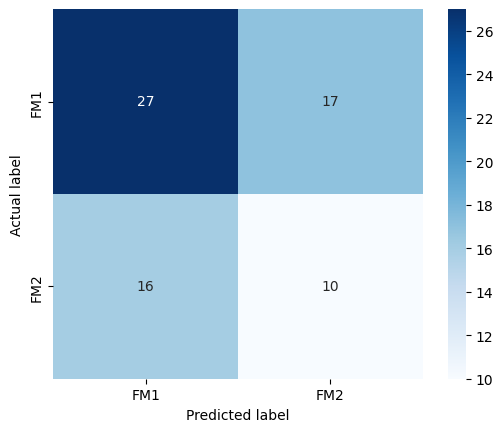

In [201]:
# Confusion Matrix
MLProundedPredict = MLPpredict.round()
MLPconfusionMatrix = confusion_matrix(testingLabelsF, MLProundedPredict)
labels = ['FM1', 'FM2']

sb.heatmap(MLPconfusionMatrix, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Text(77.92222222222227, 0.5, 'Actual label')

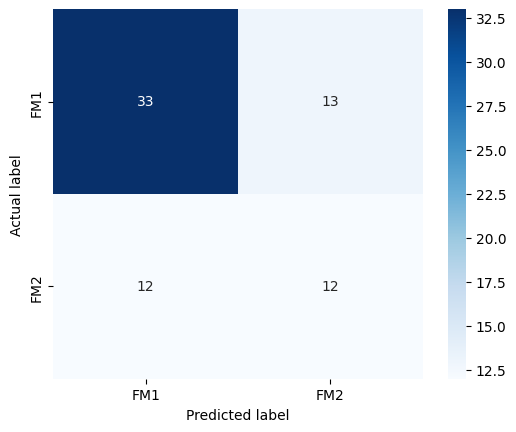

In [202]:
# Confusion Matrix
MLProundedPredict2 = MLPpredict2.round()
MLPconfusionMatrix2 = confusion_matrix(sampledTestingLabelsF, MLProundedPredict2)
labels = ['FM1', 'FM2']

sb.heatmap(MLPconfusionMatrix2, square=True, annot=True, fmt='d', cbar=True, cmap='Blues',
           xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

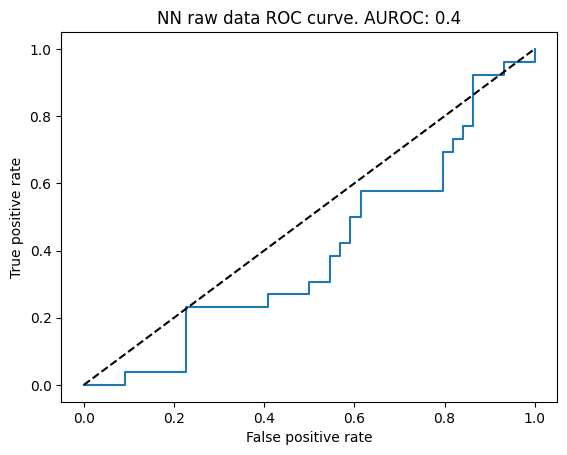

In [203]:
fpr, tpr, thresholds = roc_curve(testingLabelsF, predict)
AUROC = np.round(roc_auc_score(testingLabelsF, predict), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'NN raw data ROC curve. AUROC: {AUROC}')
plt.show()


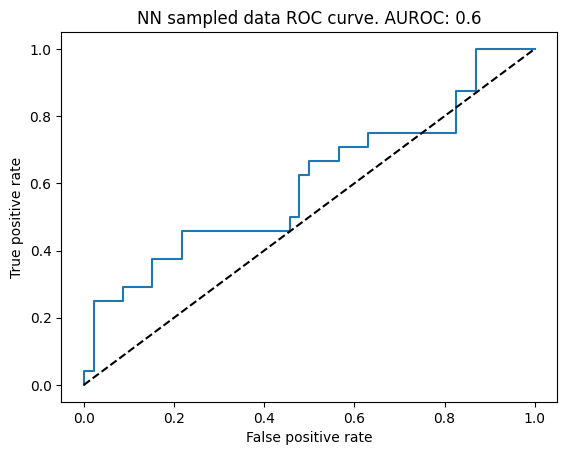

In [204]:
fpr, tpr, thresholds = roc_curve(sampledTestingLabelsF, predict2)
AUROC = np.round(roc_auc_score(sampledTestingLabelsF, predict2), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'NN sampled data ROC curve. AUROC: {AUROC}')
plt.show()


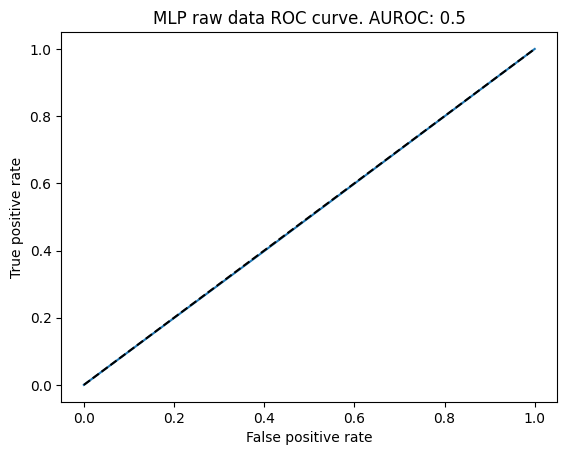

In [205]:
fpr, tpr, thresholds = roc_curve(testingLabelsF, MLPpredict)
AUROC = np.round(roc_auc_score(testingLabelsF, MLPpredict), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'MLP raw data ROC curve. AUROC: {AUROC}')
plt.show()


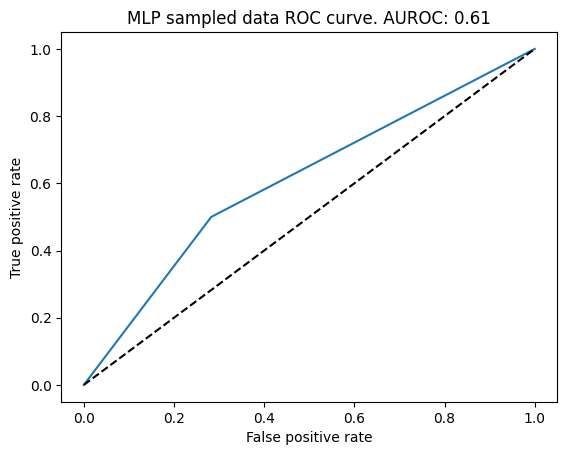

In [206]:
fpr, tpr, thresholds = roc_curve(sampledTestingLabelsF, MLPpredict2)
AUROC = np.round(roc_auc_score(sampledTestingLabelsF, MLPpredict2), 2)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'MLP sampled data ROC curve. AUROC: {AUROC}')
plt.show()
